In [1]:
# imports some utilities ...

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('merged_dataset.csv', index_col=[0])

## Let's vizualisate that

In [3]:
df.head()

,Site,lmr_fungicides,lmr_insecticides,lmr_herbicides,111,112,121,122,123,124,...,411,412,421,422,423,511,512,521,522,523
0,B0012,1,0,0,209.227976,6653.099130,17647.006209,0.0,0.0,0.0,...,0.0,0.000000e+00,0.0,0.0,0.0,8800.30667,0.0,0.0,0.0,0.0
1,B0017,1,0,0,0.000000,7607.874295,2.319998,0.0,0.0,0.0,...,0.0,0.000000e+00,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2,B0019,0,0,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,8.187923e+02,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3,B0021,1,0,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,2.574868e+03,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
4,B0023,0,0,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,1.809062e+06,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


In [4]:
df.shape

(57, 48)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 56
Data columns (total 48 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Site              57 non-null     object 
 1   lmr_fungicides    57 non-null     int64  
 2   lmr_insecticides  57 non-null     int64  
 3   lmr_herbicides    57 non-null     int64  
 4   111               57 non-null     float64
 5   112               57 non-null     float64
 6   121               57 non-null     float64
 7   122               57 non-null     float64
 8   123               57 non-null     float64
 9   124               57 non-null     float64
 10  131               57 non-null     float64
 11  132               57 non-null     float64
 12  133               57 non-null     float64
 13  141               57 non-null     float64
 14  142               57 non-null     float64
 15  211               57 non-null     float64
 16  212               57 non-null     float64
 17 

In [6]:
df.describe(include=['int64', 'float64'])
# df.describe(include=['int64', 'float64']).transpose()

,lmr_fungicides,lmr_insecticides,lmr_herbicides,111,112,121,122,123,124,131,...,411,412,421,422,423,511,512,521,522,523
count,57.000000,57.000000,57.000000,57.000000,5.700000e+01,5.700000e+01,57.000000,57.000000,57.000000,5.700000e+01,...,57.0,5.700000e+01,57.0,57.0,57.000000,57.000000,57.000000,57.0,57.0,57.000000
mean,0.614035,0.140351,0.087719,389.289932,4.384149e+05,1.615709e+05,198.756957,35.163690,27.331065,2.599861e+04,...,0.0,3.179747e+04,0.0,0.0,12.419478,226.420898,25.524836,0.0,0.0,17.269659
std,0.491150,0.350438,0.285401,2049.678099,1.262078e+06,7.086092e+05,479.722186,239.816443,206.345017,1.583911e+05,...,0.0,2.396083e+05,0.0,0.0,66.653643,1225.243534,107.609683,0.0,0.0,105.957421
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.0,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.225678e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.0,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.029865e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.0,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
75%,1.000000,0.000000,0.000000,0.000000,7.328884e+03,5.337917e+02,65.325567,0.000000,0.000000,0.000000e+00,...,0.0,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
max,1.000000,1.000000,1.000000,15107.362039,5.206697e+06,4.053755e+06,2509.438121,1802.939005,1557.870715,1.160708e+06,...,0.0,1.809062e+06,0.0,0.0,413.179539,8800.306670,631.183641,0.0,0.0,776.102211


In [7]:
df['lmr_fungicides'].value_counts()

1    35
0    22
Name: lmr_fungicides, dtype: int64

In [8]:
df['lmr_insecticides'].value_counts()

0    49
1     8
Name: lmr_insecticides, dtype: int64

In [9]:
df['lmr_herbicides'].value_counts()

0    52
1     5
Name: lmr_herbicides, dtype: int64

In [10]:
df['111'].value_counts()

0.000000        51
391.077976       1
209.227976       1
3098.057557      1
1967.704980      1
15107.362039     1
1416.095618      1
Name: 111, dtype: int64

In [11]:
df['412'].value_counts()

0.000000e+00    54
1.809062e+06     1
8.187923e+02     1
2.574868e+03     1
Name: 412, dtype: int64

In [12]:
df['333'].value_counts()

0.0    57
Name: 333, dtype: int64

<AxesSubplot:>

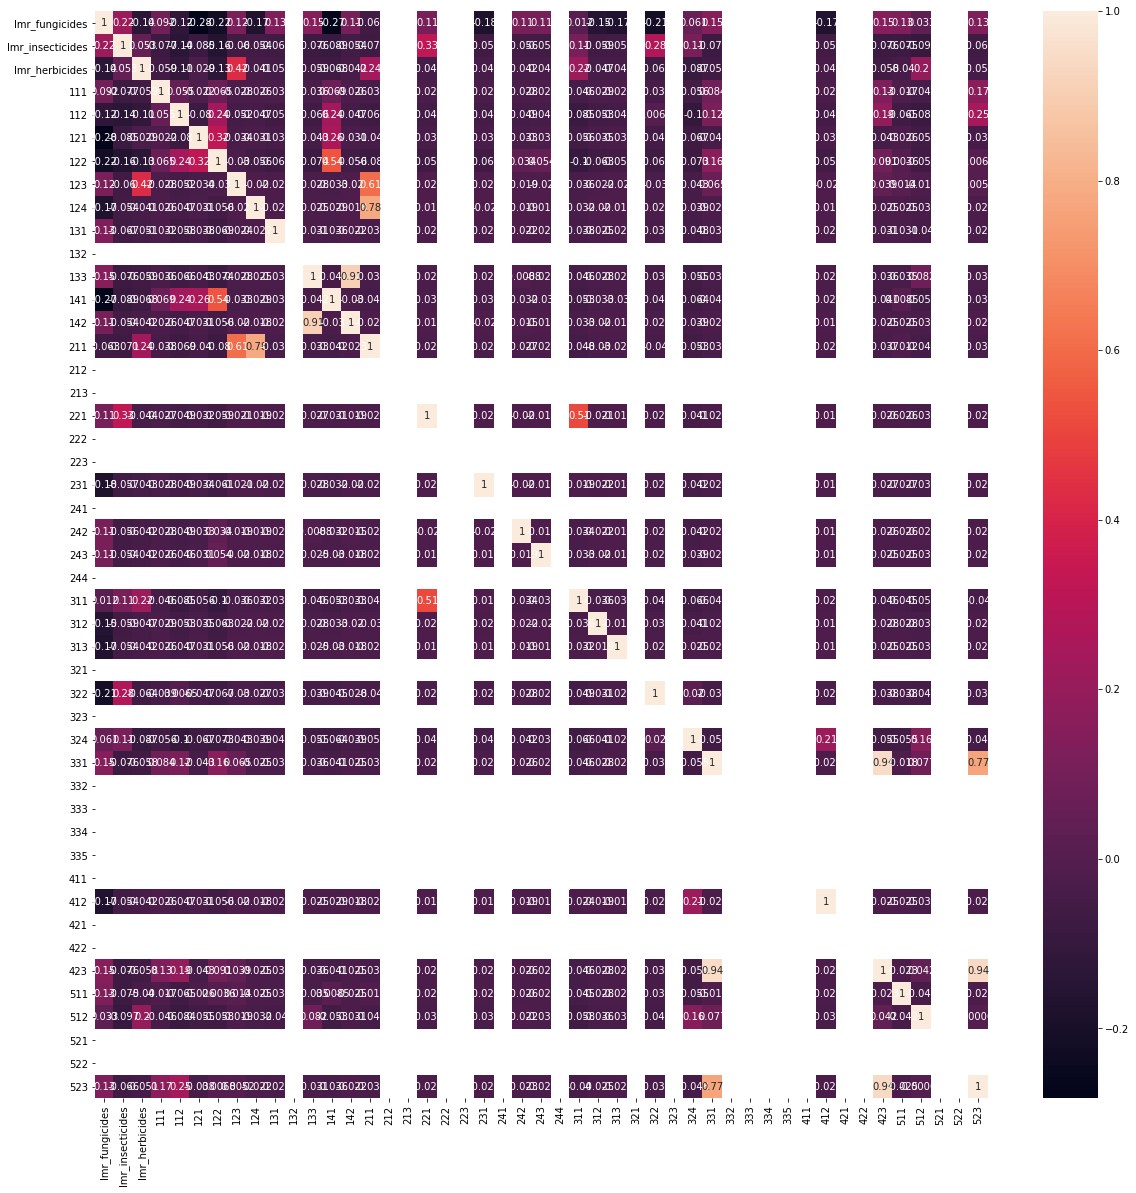

In [13]:
import seaborn as sns

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,)

<AxesSubplot:>

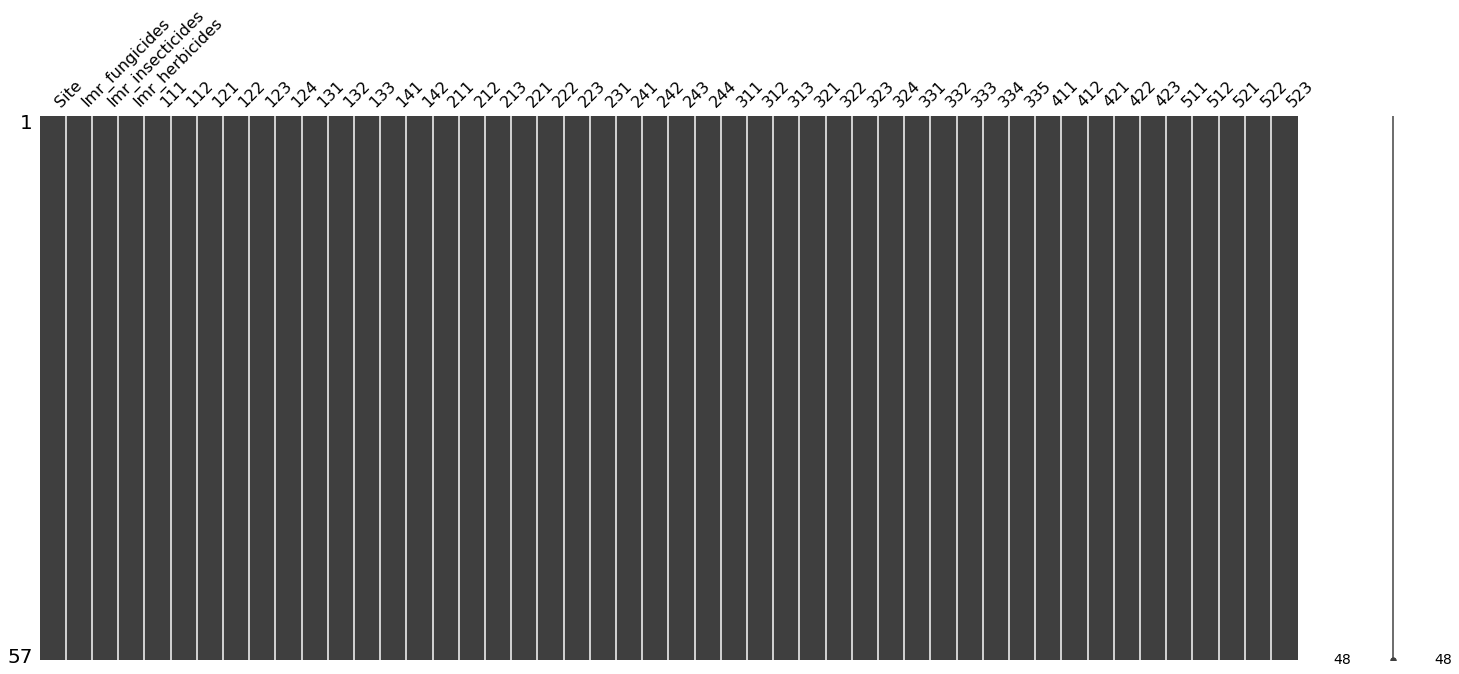

In [14]:
import missingno as msno
%matplotlib inline

msno.matrix(df)

**On peux constater un cruel manque de données et un certains déséquilibre entre les valeurs cibles**( lmr_fungicides, lmr_insecticides, lmr_herbicides )

## Cleaning & spliting the dataset

In [15]:
df = df.drop(['Site'], axis=1)

In [16]:
df.head()

,lmr_fungicides,lmr_insecticides,lmr_herbicides,111,112,121,122,123,124,131,...,411,412,421,422,423,511,512,521,522,523
0,1,0,0,209.227976,6653.099130,17647.006209,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.0,0.0,0.0,8800.30667,0.0,0.0,0.0,0.0
1,1,0,0,0.000000,7607.874295,2.319998,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2,0,0,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,8.187923e+02,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3,1,0,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,2.574868e+03,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
4,0,0,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,1.809062e+06,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


In [17]:
df = df.drop(['132','212','213','222', '223', '241', '244',
              '321', '323', '332', '333', '334', '335', '411',
              '421', '422', '521', '522', '523'], axis=1)

In [18]:
df.shape

(57, 28)

<AxesSubplot:>

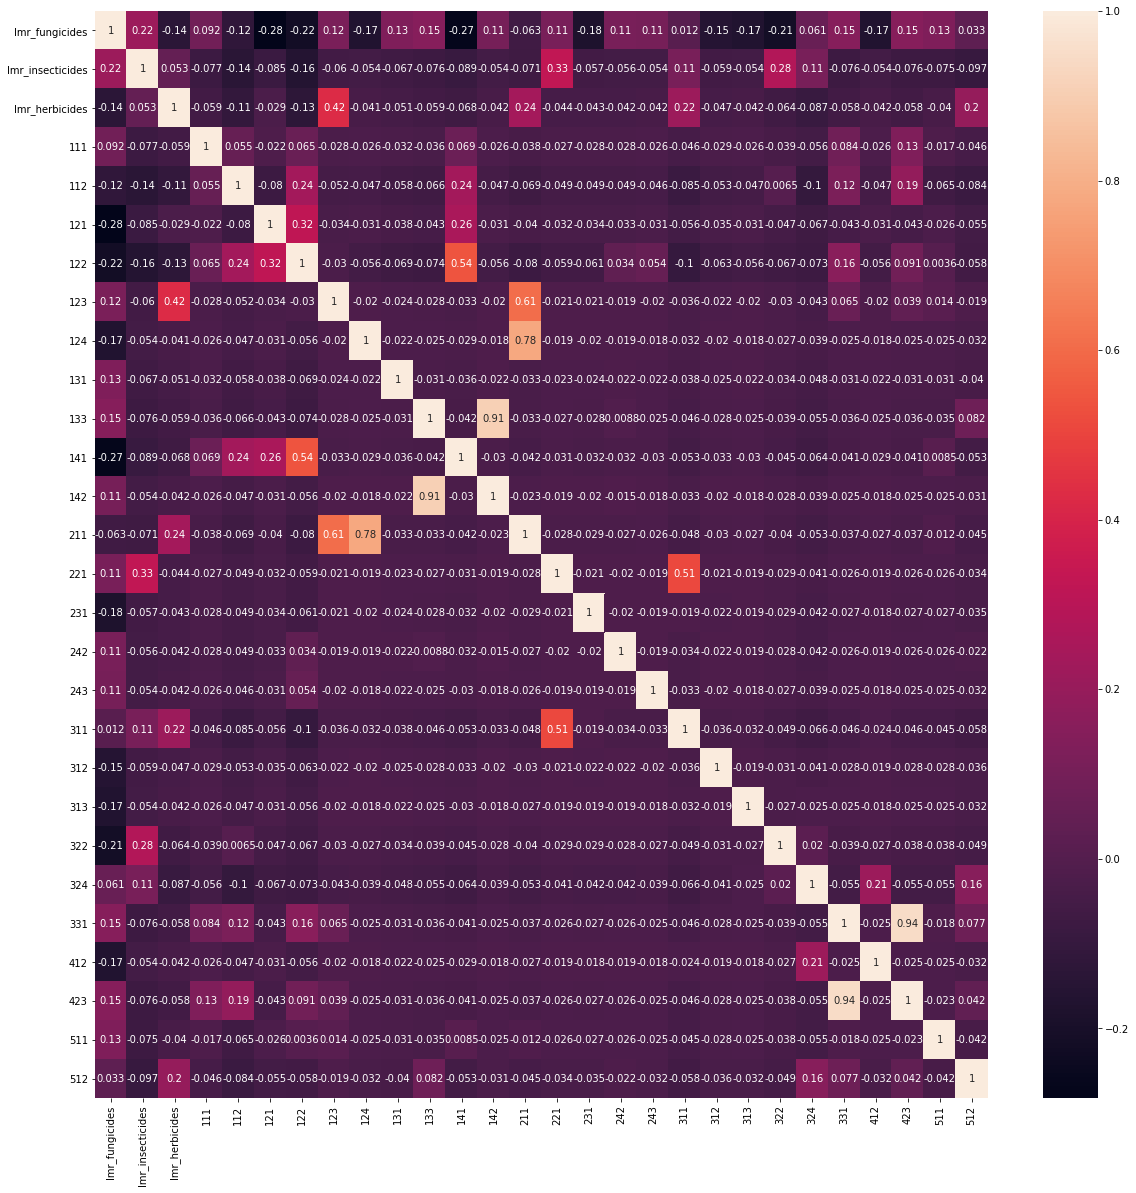

In [19]:
import seaborn as sns

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,)

In [20]:
X = df.drop(['lmr_fungicides', 'lmr_insecticides', 'lmr_herbicides'], axis=1)

In [21]:
X.head()

,111,112,121,122,123,124,131,133,141,142,...,311,312,313,322,324,331,412,423,511,512
0,209.227976,6653.099130,17647.006209,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,271.303175,0.000000e+00,0.000000,0.0,0.000000,0.0,0.000000e+00,0.0,8800.30667,0.0
1,0.000000,7607.874295,2.319998,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,1018.334103,1.467201e+03,2275.167150,0.0,0.000000,0.0,0.000000e+00,0.0,0.00000,0.0
2,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,196.193589,5.146666e+06,1701.143283,0.0,0.000000,0.0,8.187923e+02,0.0,0.00000,0.0
3,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,1024.849837,6.361784e+05,5512.222772,0.0,0.000000,0.0,2.574868e+03,0.0,0.00000,0.0
4,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,159.015078,...,48862.652712,2.975520e+03,49.597455,0.0,917.672748,0.0,1.809062e+06,0.0,0.00000,0.0


In [23]:
y = df[['lmr_fungicides','lmr_insecticides', 'lmr_herbicides']]
y.head()

,lmr_fungicides,lmr_insecticides,lmr_herbicides
0,1,0,0
1,1,0,0
2,0,0,0
3,1,0,0
4,0,0,0


In [24]:
y['cat'] = y.apply(lambda x: (str(x['lmr_fungicides']) + str(x['lmr_insecticides']) + str(x['lmr_herbicides']))  , axis=1)

<ipython-input-24-5da937e29b4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['cat'] = y.apply(lambda x: (str(x['lmr_fungicides']) + str(x['lmr_insecticides']) + str(x['lmr_herbicides']))  , axis=1)


In [25]:
y['cat'] = y['cat'].astype('category')
y['cat_label'] = y['cat'].cat.codes

<ipython-input-25-151baa534227>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['cat'] = y['cat'].astype('category')
<ipython-input-25-151baa534227>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['cat_label'] = y['cat'].cat.codes


In [26]:
labels = y.set_index('cat_label')['cat'].to_dict()
labels

{3: '100', 0: '000', 5: '110', 4: '101', 6: '111', 2: '010', 1: '001'}

In [27]:
len(labels)

7

In [28]:
y.head()

,lmr_fungicides,lmr_insecticides,lmr_herbicides,cat,cat_label
0,1,0,0,100,3
1,1,0,0,100,3
2,0,0,0,000,0
3,1,0,0,100,3
4,0,0,0,000,0


In [29]:
y = y['cat_label']

### Splitting

In [233]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [234]:

# y_train = np.expand_dims(y_train, axis=0)
# y_test = np.expand_dims(y_test, axis=0)

In [235]:
# indices = y_test
# depth = len(labels)
# y_test = np.expand_dims(y_test, axis=0)

In [236]:
from tensorflow.keras import layers, models
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# with tf.device('/GPU:0'):

Num GPUs Available:  1


## CONFIG

In [321]:
INPUT_SIZE = X_train.shape[1]
EPOCHS = 200
LEARNING_RATE = 0.00001
OUTPUT_SIZE = 7
BATCH_SIZE = 1

In [322]:
print("INPUT_SIZE:", INPUT_SIZE)
print("EPOCHS:", EPOCHS)
print("LEARNING_RATE:", LEARNING_RATE)
print("OUTPUT_SIZE:", OUTPUT_SIZE)
print("BATCH_SIZE:", BATCH_SIZE)

INPUT_SIZE: 25
EPOCHS: 200
LEARNING_RATE: 1e-05
OUTPUT_SIZE: 7
BATCH_SIZE: 1


## TRAINING

In [323]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Init a standard scaler
ss = MinMaxScaler()

# Scale the features
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

X_train[0]

array([0.00000000e+00, 8.10102005e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 1.11300951e-04, 0.00000000e+00, 8.66458498e-01,
       0.00000000e+00, 7.22445012e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [324]:
X_train.shape

(51, 25)

In [325]:
y_train.shape

(51,)

In [326]:
y_test.shape

(6,)

In [327]:
X_test.shape

(6, 25)

### Using Deep Learning

In [328]:
model = models.Sequential()

model.add(layers.Dense(7, activation='relu', input_shape=(INPUT_SIZE,)))

model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
# model.add(layers.Dropout(0.2))

model.add(layers.Dense(OUTPUT_SIZE, activation='softmax'))

model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 7)                 182       
_________________________________________________________________
dense_95 (Dense)             (None, 32)                256       
_________________________________________________________________
dense_96 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_97 (Dense)             (None, 7)                 231       
Total params: 1,725
Trainable params: 1,725
Non-trainable params: 0
_________________________________________________________________


In [329]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=LEARNING_RATE)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [330]:
with tf.device('/GPU:0'):

    history = model.fit(X_train, y_train, epochs=EPOCHS, 
                        validation_data=(X_test, y_test), batch_size=BATCH_SIZE)

Epoch 1/200
51/51 [==============================] - 1s 6ms/step - loss: 1.9368 - accuracy: 0.1671 - val_loss: 1.8148 - val_accuracy: 0.0000e+00
Epoch 2/200
51/51 [==============================] - 0s 4ms/step - loss: 1.9389 - accuracy: 0.2365 - val_loss: 1.8118 - val_accuracy: 0.0000e+00
Epoch 3/200
51/51 [==============================] - 0s 4ms/step - loss: 1.9336 - accuracy: 0.1789 - val_loss: 1.8094 - val_accuracy: 0.0000e+00
Epoch 4/200
51/51 [==============================] - 0s 4ms/step - loss: 1.9390 - accuracy: 0.1320 - val_loss: 1.8065 - val_accuracy: 0.0000e+00
Epoch 5/200
51/51 [==============================] - 0s 4ms/step - loss: 1.9269 - accuracy: 0.1598 - val_loss: 1.8039 - val_accuracy: 0.0000e+00
Epoch 6/200
51/51 [==============================] - 0s 4ms/step - loss: 1.9299 - accuracy: 0.2385 - val_loss: 1.8013 - val_accuracy: 0.1667
Epoch 7/200
51/51 [==============================] - 0s 4ms/step - loss: 1.9208 - accuracy: 0.2670 - val_loss: 1.7985 - val_accuracy: 

51/51 [==============================] - 0s 4ms/step - loss: 1.8742 - accuracy: 0.4001 - val_loss: 1.6760 - val_accuracy: 0.5000
Epoch 59/200
51/51 [==============================] - 0s 4ms/step - loss: 1.8743 - accuracy: 0.3134 - val_loss: 1.6740 - val_accuracy: 0.5000
Epoch 60/200
51/51 [==============================] - 0s 3ms/step - loss: 1.8767 - accuracy: 0.3912 - val_loss: 1.6716 - val_accuracy: 0.5000
Epoch 61/200
51/51 [==============================] - 0s 4ms/step - loss: 1.8617 - accuracy: 0.4423 - val_loss: 1.6693 - val_accuracy: 0.5000
Epoch 62/200
51/51 [==============================] - 0s 4ms/step - loss: 1.8674 - accuracy: 0.3881 - val_loss: 1.6672 - val_accuracy: 0.5000
Epoch 63/200
51/51 [==============================] - 0s 4ms/step - loss: 1.8583 - accuracy: 0.4201 - val_loss: 1.6649 - val_accuracy: 0.5000
Epoch 64/200
51/51 [==============================] - 0s 4ms/step - loss: 1.8675 - accuracy: 0.5588 - val_loss: 1.6630 - val_accuracy: 0.5000
Epoch 65/200
51/51 

51/51 [==============================] - 0s 4ms/step - loss: 1.7872 - accuracy: 0.4984 - val_loss: 1.5526 - val_accuracy: 0.5000
Epoch 116/200
51/51 [==============================] - 0s 3ms/step - loss: 1.7848 - accuracy: 0.4182 - val_loss: 1.5505 - val_accuracy: 0.6667
Epoch 117/200
51/51 [==============================] - 0s 3ms/step - loss: 1.7816 - accuracy: 0.5973 - val_loss: 1.5483 - val_accuracy: 0.6667
Epoch 118/200
51/51 [==============================] - 0s 3ms/step - loss: 1.7666 - accuracy: 0.5840 - val_loss: 1.5460 - val_accuracy: 0.6667
Epoch 119/200
51/51 [==============================] - 0s 4ms/step - loss: 1.7796 - accuracy: 0.4716 - val_loss: 1.5438 - val_accuracy: 0.6667
Epoch 120/200
51/51 [==============================] - 0s 4ms/step - loss: 1.7854 - accuracy: 0.4664 - val_loss: 1.5416 - val_accuracy: 0.6667
Epoch 121/200
51/51 [==============================] - 0s 4ms/step - loss: 1.7645 - accuracy: 0.5428 - val_loss: 1.5396 - val_accuracy: 0.6667
Epoch 122/200

51/51 [==============================] - 0s 4ms/step - loss: 1.7527 - accuracy: 0.4124 - val_loss: 1.4256 - val_accuracy: 0.6667
Epoch 173/200
51/51 [==============================] - 0s 4ms/step - loss: 1.6882 - accuracy: 0.5116 - val_loss: 1.4233 - val_accuracy: 0.6667
Epoch 174/200
51/51 [==============================] - 0s 4ms/step - loss: 1.6801 - accuracy: 0.5574 - val_loss: 1.4212 - val_accuracy: 0.6667
Epoch 175/200
51/51 [==============================] - 0s 4ms/step - loss: 1.6294 - accuracy: 0.5470 - val_loss: 1.4188 - val_accuracy: 0.6667
Epoch 176/200
51/51 [==============================] - 0s 4ms/step - loss: 1.6564 - accuracy: 0.6087 - val_loss: 1.4168 - val_accuracy: 0.6667
Epoch 177/200
51/51 [==============================] - 0s 4ms/step - loss: 1.7282 - accuracy: 0.4879 - val_loss: 1.4146 - val_accuracy: 0.6667
Epoch 178/200
51/51 [==============================] - 0s 3ms/step - loss: 1.7156 - accuracy: 0.5420 - val_loss: 1.4123 - val_accuracy: 0.6667
Epoch 179/200

1/1 [==============================] - 0s 107ms/step - loss: 1.3642 - accuracy: 0.6667


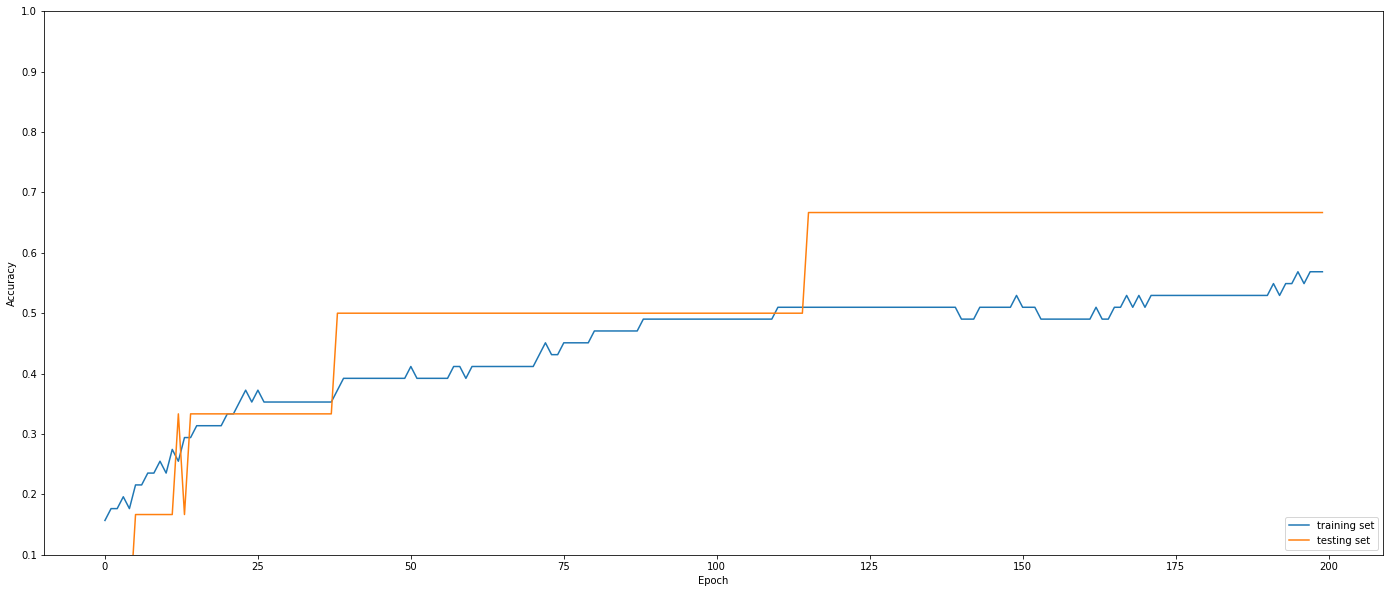

In [331]:
plt.figure(figsize=(24,10))
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label = 'testing set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test)

In [332]:
# model.save('biomodel.h5')

In [333]:
y_pred = model.predict(X_test)
y_pred

array([[3.48459512e-01, 1.25949651e-01, 4.14045118e-02, 2.90862381e-01,
        6.39646053e-02, 9.63542610e-02, 3.30051146e-02],
       [1.99246839e-01, 1.31169811e-01, 9.97770205e-02, 2.05034673e-01,
        1.17894456e-01, 1.46557659e-01, 1.00319631e-01],
       [7.49451280e-01, 9.15881526e-03, 4.29830543e-05, 2.40950152e-01,
        1.47841920e-05, 3.80165933e-04, 1.85989563e-06],
       [1.98821619e-01, 1.31484389e-01, 1.00159869e-01, 2.04754412e-01,
        1.17975950e-01, 1.46625385e-01, 1.00178391e-01],
       [2.05952734e-01, 1.31023541e-01, 9.60144103e-02, 2.12543726e-01,
        1.14852808e-01, 1.46050692e-01, 9.35620442e-02],
       [2.14515954e-01, 1.39089540e-01, 1.00674912e-01, 2.14833066e-01,
        1.02676608e-01, 1.43293157e-01, 8.49167779e-02]], dtype=float32)

In [334]:
y_pred.argmax(axis=1)

array([0, 3, 0, 3, 3, 3], dtype=int64)

In [335]:
labels

{3: '100', 0: '000', 5: '110', 4: '101', 6: '111', 2: '010', 1: '001'}